#Laboratorio 4 (QKD)

Jose Andres Henao Alzate CC 1036686332


Santiago Giraldo Tabares CC 1000763987


Jakob Kuhn

#Marco teórico

*Consulte y explique el protocolo de seguridad BB843*


# Protocolo de seguridad BB84

El **BB84** es un protocolo de distribución de llaves cuánticas propuesto por **Charles Bennett y Gilles Brassard en 1984**. Su objetivo es permitir que dos partes (comúnmente llamadas **Alice** y **Bob**) compartan una **llave secreta** de forma segura, incluso si un atacante (conocido como **Eve**) intenta interceptar la comunicación. Este protocolo se apoya en los principios fundamentales de la **mecánica cuántica**, como el **principio de incertidumbre de Heisenberg** y el **teorema de no clonación**, que hacen imposible copiar o medir un estado cuántico sin perturbarlo.

---

## Pasos del protocolo BB84

1. **Generación de bits y bases por Alice**  
   - Alice genera dos secuencias aleatorias:
     - Una de **bits clásicos** (0 y 1).
     - Otra de **bases de polarización**: puede ser la **recta (+)** (| horizontal / vertical) o la **diagonal (×)** (/ y \).
   - Luego, Alice **codifica cada bit** como un **fotón polarizado** según su base correspondiente:
     - **Base recta (+)**:
       - 0 → Polarización horizontal (→)
       - 1 → Polarización vertical (↑)
     - **Base diagonal (×)**:
       - 0 → Polarización a 45°
       - 1 → Polarización a 135°

2. **Envío de fotones a Bob**  
   Alice envía la secuencia de **fotones polarizados** a Bob a través de un **canal cuántico**.

3. **Medición por parte de Bob**  
   - Bob, sin conocer las bases usadas por Alice, selecciona **aleatoriamente** una base (recta o diagonal) para **medir cada fotón** recibido.
   - Si Bob elige la **misma base** que Alice, obtiene el **bit correcto**.
   - Si Bob elige una base **distinta**, el resultado es aleatorio (con 50% de probabilidad para 0 o 1).

4. **Comparación de bases públicamente**  
   - A través de un **canal clásico** el cual no es necesario que sea seguro, Alice y Bob **comunican las bases** que usaron, pero **no los bits**.
   - Descartan los bits donde sus bases no coinciden debido a que estos son sujetos a la probabilidad de haber medido un cero o un uno.

5. **Generación de la llave compartida**  
   - Los bits restantes, donde las bases coincidieron, forman la **llave secreta compartida**.

6. **Detección de eavesdropping (interceptación)**  
   - Para verificar si Eve intentó espiar, Alice y Bob comparan una pequeña parte de la llave final públicamente.
   - Si hay discrepancias, suponen que hay un espía y **descartan la clave**[1].


El ejemplo propuesto por los autores de dicho procedimiento se muestra en la figura 1.

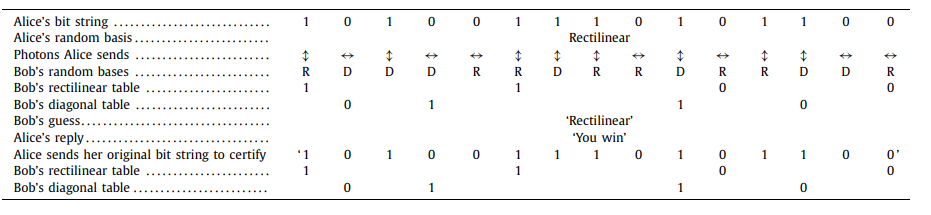

Figura 1. Procedimiento de compartimiento de la llave privada entre Alice y Bob.

*1.2. Indique las condiciones en las que se fundamenta este protocolo BB84.*

Las condiciones en las que se fundamenta este protocolo son:

* Teorema de la no clonación.
* principio de incertidumbre de Heisenberg

Esto hacen que no sea posible el medir un estado cuántico sin colapsarlo o perturbarlo, gracias a esto es factible el detectar si hubo un espía en medio del compartimiento de la llave privada, puesto que, el intentar medir puede hacer colapsar el estado de polarización o de alterarlo.

#Análisis de un ejemplo del Tutorial del Qiskit

In [ ]:
 !pip install qiskit
 !pip install qiskit-ibm-runtime
 !pip install qiskit[visualization]
 !pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import Initialize
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from numpy.random import randint

Si Alicia prepara un qúbit en el estado $|+\rangle$ (es decir, 0 en la base $X$), y Bob lo mide en esa misma base, entonces Bob obtendrá con certeza el resultado 0.

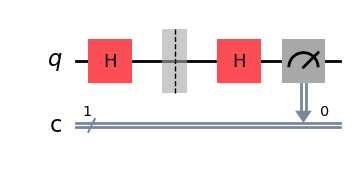

In [ ]:
qc = QuantumCircuit(1, 1)

# Alice prepara el qubit en el estado |+⟩
qc.h(0)
qc.barrier()

# Bob mide en la base X, aplicando otra H y midiendo
qc.h(0)
qc.measure(0, 0)

# Dibujar el circuito
display(qc.draw(output='mpl'))
plt.show()
# Simular el circuito con AerSimulator
simulator = AerSimulator()
job = simulator.run(qc)
result = job.result()



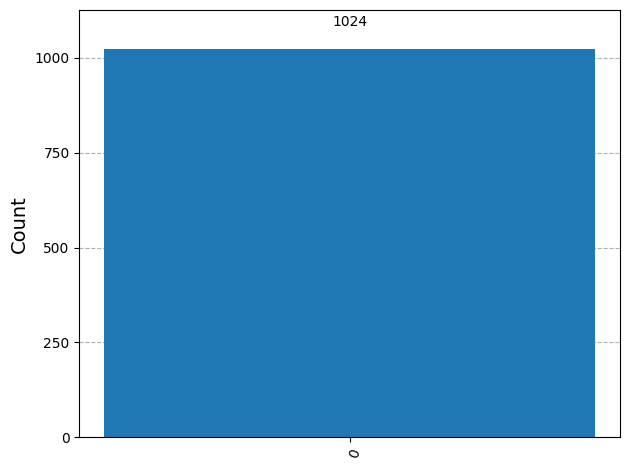

In [ ]:
# Mostrar histograma de resultados
counts = result.get_counts(qc)
plot_histogram(counts)

Pero si Eva intenta medir este qúbit en la base $Z$ antes de que llegue a Bob, cambiará su estado de $|+\rangle$ a $|0\rangle$ o $|1\rangle$, y entonces Bob ya no tendrá la certeza de obtener 0 al medir.

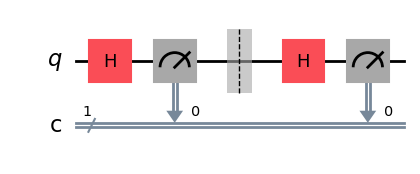

In [ ]:
qc = QuantumCircuit(1,1)
# Alice prepara un qubit en estado |+>
qc.h(0)
# Alice envia el qubit a Bob
# pero Eva lo intercepta e intenta medirlo/leerlo
qc.measure(0, 0)
qc.barrier()
# Eva lo pasa a Bob,
# quien lo mide en la base X
qc.h(0)
qc.measure(0,0)

# Dibujo y simulación del circuito

display(qc.draw(output='mpl'))
aer_sim = AerSimulator()
job = aer_sim.run(qc)


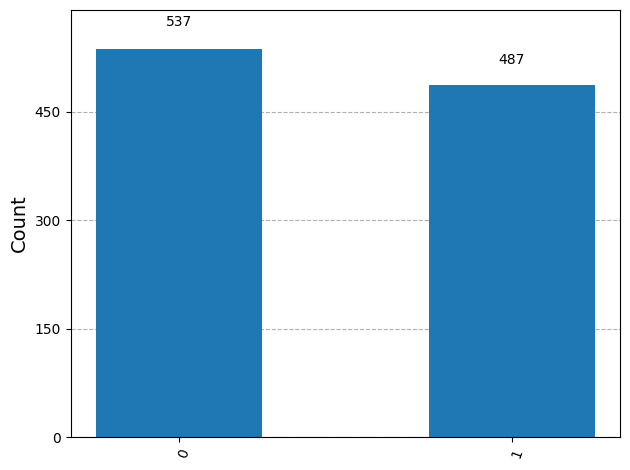

In [ ]:
plot_histogram(job.result().get_counts())

Podemos ver que ahora Bob tiene un 50% de probabilidad de medir `1`, y si eso ocurre, tanto él como Alicia sabrán que algo anda mal con su canal de comunicación.

El protocolo de distribución cuántica de claves consiste en repetir este proceso suficientes veces para que un posible espía tenga una probabilidad despreciable de interceptar la comunicación sin ser detectado. El protocolo, de forma resumida, es el siguiente:

**– Paso 1**

Alicia elige una cadena de bits aleatorios, por ejemplo:

`1000101011010100`

Y también elige, al azar, una base para cada bit:

`ZZXZXXXZXZXXXXXX`

Alicia mantiene ambas piezas de información en secreto.

**– Paso 2**

Luego, Alicia codifica cada bit en un qúbit utilizando la base que eligió; esto significa que cada qúbit queda en uno de los estados $|0\rangle$, $|1\rangle$, $|+\rangle$ o $|-\rangle$, seleccionados aleatoriamente. En este caso, la cadena de qúbits se vería así:

$$ |1\rangle|0\rangle|+\rangle|0\rangle|-\rangle|+\rangle|-\rangle|0\rangle|-\rangle|1\rangle|+\rangle|-\rangle|+\rangle|-\rangle|+\rangle|+\rangle
$$

Este es el mensaje que Alicia le envía a Bob.

**– Paso 3**

Bob mide cada qúbit usando bases elegidas al azar. Por ejemplo, podría usar las siguientes:

`XZZZXZXZXZXZZZXZ`

Y guarda en secreto los resultados de sus mediciones.

**– Paso 4**

Después, Bob y Alicia comparten públicamente qué base usaron para cada qúbit. Si Bob midió un qúbit en la misma base en la que Alicia lo preparó, ese bit se conserva como parte de la clave secreta compartida; si no, se descarta.

**– Paso 5**

Finalmente, Bob y Alicia comparan una muestra aleatoria de sus claves. Si las muestras coinciden, pueden estar seguros (dentro de un pequeño margen de error) de que la transmisión fue exitosa.

### 1. Estados cuánticos utilizados en BB84

El protocolo BB84 usa **dos bases** de codificación:

- La base **computacional (Z)**: $|0\rangle$ y $|1\rangle$
- La base **diagonal (X)**: $|+\rangle$ y $|-\rangle$

#### 1.1. Representación matricial de los estados

En notación vectorial (ket), los estados se representan como:

- $|0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}$
- $|1\rangle = \begin{bmatrix}0 \\ 1\end{bmatrix}$
- $|+\rangle = \dfrac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) = \dfrac{1}{\sqrt{2}} \begin{bmatrix}1 \\ 1\end{bmatrix}$
- $|-\rangle = \dfrac{1}{\sqrt{2}} \left( |0\rangle - |1\rangle \right) = \dfrac{1}{\sqrt{2}} \begin{bmatrix}1 \\ -1\end{bmatrix}$

#### 1.2. Preparación de los estados cuánticos

Todos los qúbit en Qiskit (y en la mayoría de plataformas cuánticas) comienzan en el estado $|0\rangle$. A partir de este, podemos preparar los demás estados usando las siguientes compuertas cuánticas:

- **Identidad (I)**: No hace nada → $|0\rangle$
- **Compuerta X (NOT cuántico)**:
  
  $$
  X = \begin{bmatrix}
  0 & 1 \\
  1 & 0
  \end{bmatrix}
  $$

  Aplicando $X$ sobre $|0\rangle$:
  
  $$
  X|0\rangle = \begin{bmatrix}0 & 1 \\ 1 & 0\end{bmatrix} \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 1\end{bmatrix} = |1\rangle
  $$

- **Compuerta Hadamard (H)**:

  $$
  H = \dfrac{1}{\sqrt{2}} \begin{bmatrix}
  1 & 1 \\
  1 & -1
  \end{bmatrix}
  $$

  Aplicando $H$ sobre $|0\rangle$:

  $$
  H|0\rangle = \dfrac{1}{\sqrt{2}} \begin{bmatrix}1 \\ 1\end{bmatrix} = |+\rangle
  $$

  Aplicando $H$ sobre $|1\rangle$:

  $$
  H|1\rangle = \dfrac{1}{\sqrt{2}} \begin{bmatrix}1 \\ -1\end{bmatrix} = |-\rangle
  $$

  Entonces, para preparar cada estado a partir de $|0\rangle$:

  \\

| Estado deseado     | Compuertas aplicadas     |
|:------------------:|:------------------------:|
| 0                  | Ninguna                  |
| 1                  | X                        |
| +                  | H                        |
| -                  | X seguida de H           |


\\

### 2. El protocolo paso a paso

#### Paso 1: Generación

- Alicia genera dos cadenas aleatorias:
  - Una de bits (`alice_bits`)
  - Otra de bases (`alice_bases`), indicando si cada bit se codifica en la base Z (0) o base X (1)

#### Paso 2: Codificación

- Alicia codifica cada bit como un qúbit usando la base correspondiente y envía todos los qúbit a Bob.

#### Paso 3: Medición

- Bob mide cada qúbit en una base aleatoria (`bob_bases`).
- Solo obtendrá resultados confiables si su base coincide con la de Alicia.

#### Paso 4: Comparación de bases

- Alicia y Bob comunican públicamente sus bases, y conservan solo los bits donde estas coinciden.
- Esto les da una clave compartida parcial (`shared_key`).

#### Paso 5: Verificación

- Comparan públicamente una muestra aleatoria de bits.
- Si todos coinciden, la clave es segura. Si no, pueden sospechar de una intercepción.

---

### 3. Seguridad: ¿Qué pasa si Eve intercepta?


#### Paso 1: Codificación cuántica

Alicia elige codificar este bit en la **base $Z$ (computacional)**. En este caso:

- Si el bit es `0` y la base es $Z$, se envía el estado:

$$
|0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}
$$

Este estado corresponde a la parte superior del eje $Z$ en la esfera de Bloch, y **no se requiere aplicar ninguna compuerta cuántica**, ya que es el estado inicial por defecto.

#### Paso 2: Transmisión del qúbit

Alicia envía el qúbit $|0\rangle$ a través del canal cuántico.

#### Paso 3: Intercepción por parte de Eve

Eve intercepta el qúbit, **pero no sabe** en qué base fue codificado. Ella decide medir en la **base $X$ (diagonal)**, es decir, con respecto a los estados:

- $|+\rangle = \dfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
- $|-\rangle = \dfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$

Sabemos que:

$$
|0\rangle = \dfrac{1}{\sqrt{2}}(|+\rangle + |-\rangle)
$$

Por lo tanto, si Eve mide en la base $X$, obtendrá:

- $|+\rangle$ con probabilidad 50%
- $|-\rangle$ con probabilidad 50%

Supongamos que mide $|-\rangle$. Entonces el qúbit colapsa a ese estado, y es **irreversible**: la información original ya se perdió.

Eve ahora reenvía el estado $|-\rangle$ a Bob.

#### Paso 4: Medición por parte de Bob

Bob, por coincidencia, **elige la base correcta**, es decir, la **base $Z$**, igual a la que usó Alicia. Recordemos:

$$
|-\rangle = \dfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

Entonces, si Bob mide en la base $Z$, tiene:

- 50% de probabilidad de obtener $|0\rangle$
- 50% de probabilidad de obtener $|1\rangle$

Así que aunque Alicia originalmente envió un bit `0`, **Bob ahora tiene una probabilidad del 50% de recibir el valor incorrecto**.

Nótese qeu, si bien Bob puede no acertar en el valor medido a pesar de haber acertado en la base escogida, también puede darse el caso en que si acierte tanto valor como base. Con lo que, en esa porción de los casos en los que hay espionaje, existe una probabilidad de que Eva espíe sin que Alice y Bob se den cuenta, pues la perturbación al estado cuántico enviado pasa por inalterada durante su "trayecto". No obstante, más adelante se podrá corroborar que, a pesae de esto, la seguridad del protocólo es, probabilisticamente, muy aceptable.



# 3. Ejemplo con Qiskit: sin espionaje



Primero veamos cómo funciona el protocolo cuando nadie está escuchando. Luego veremos cómo Alicia y Bob pueden detectar a un espía. Como siempre, comencemos importando todo lo que necesitamos:


Para generar claves pseudoaleatorias, usaremos la función `randint` de numpy. Para este caso de ejemplo, fijaremos la semilla en 0:


In [ ]:
np.random.seed(seed=0)

In [ ]:
n = 100            # Se denominará la longitud del mensaje inicial de Alice como 'n'. Alice enviará un mensaje de 100 qubits de longitud en este caso.

### 3.1 Paso 1:

Alicia genera su conjunto aleatorio de bits:


In [ ]:
## Paso 1
# Alice genera bits
alice_bits = randint(2, size=n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


Por el momento, el conjunto de bits '`alice_bits`' solo es conocido por Alicia. Se llevará un registro de qué información es conocida solo por Alicia, cuál es conocida solo por Bob, y cuál ha sido enviada por el canal de Eva, en una tabla como esta:

| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |        &nbsp;        |

### 3.2 Paso 2:

Alicia elige codificar cada bit en un qúbit usando la base $X$ o $Z$, seleccionada al azar, y guarda la elección para cada qúbit en `alice_bases`. En este caso, un `0` significa "preparar en la base $Z$" y un `1` significa "preparar en la base $X$":


Alice elige en que base codificar, si es 0 lo hará en Z si es 1, lo hará en X.

In [ ]:
np.random.seed(seed=0)
n = 100
## Paso 1
#Alice genera bits
alice_bits = randint(2, size=n)

## Paso 2
# Crea un arreglo para indicarnos qué qubits
# están codificados en qué base
alice_bases = randint(2, size=n)
print(alice_bases)
print(len(alice_bases))

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
100


### (Aleatoriedad real)
Ahora bien, para un acercamiento más realista a la naturaleza altamente segura del protocolo, podemos generar alice_bases y alice_bits con verdadera aleatoriedad. Esto, debido a que empleando las funciones np.random.seed() y randint() contamos solo con una suerte de pseudoaleatoriedad. De hecho, hablar de aleatoriedad real en computación clásica, es un error bastante común.

Con el fin de hacer una implementación de ejemplo un poco más cercana a la realidad, se recurrirá nuevamente a la computación cuántica para la generación de arreglos de bits y bases completamente aleatorios mediante computación cuántica.



In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def get_quantum_random_bits(n):
    """Genera n bits cuánticos aleatorios (n debe ser <= 29)."""
    qc_aux = QuantumCircuit(n, n)
    qc_aux.h(range(n))
    qc_aux.measure(range(n), range(n))

    simulator = AerSimulator()
    compiled_qc = transpile(qc_aux, simulator)
    result = simulator.run(compiled_qc, shots=1, memory=True).result()

    return list(map(int, result.get_memory()[0]))

def generate_bits_total(n_total, chunk_size=10):
    """Genera n_total bits cuánticos aleatorios en bloques de tamaño chunk_size."""
    bits = []
    for _ in range(n_total // chunk_size):
        bits += get_quantum_random_bits(chunk_size)
    return bits

# Cantidad total de bits deseados
n = 100

## Paso 1
# Alice genera bits
alice_bits = generate_bits_total(n)

## Paso 2
# Alice elige las bases de codificación
alice_bases = generate_bits_total(n)

print("alice_bits:", alice_bits)
print("alice_bases:", alice_bases)
print(len(alice_bases))


alice_bits: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
alice_bases: [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]
100


Alicia también mantiene esta información en privado:

| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |        &nbsp;        |

La función `encode_message` que aparece a continuación crea una lista de `QuantumCircuit` 's, cada uno representando un solo qúbit en el mensaje de Alicia:


* Función para ccodificar la información en una lista que será enviada a Bob

In [ ]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Preparar qubit en la base Z
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else: # Preparar qubit en la base X
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [ ]:
message = encode_message(alice_bits, alice_bases)

Podemos ver que el primer bit en `alice_bits` es `0`, y la base en la que lo codifica es la base $X$ (representada por `1`).


Y si observamos el primer circuito en `message` (que representa el primer qúbit en el mensaje de Alicia), podemos verificar que Alicia ha preparado un qúbit en el estado $|+\rangle$:


bit = 1
basis = 0


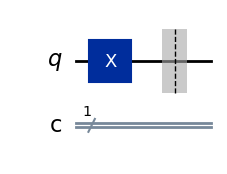

In [ ]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])
display(message[0].draw(output='mpl'))


Este mensaje de qúbits es entonces enviado a Bob a través del canal cuántico de Eva:

| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |                      |
|        message         |      message        |      message         |

### 3.3 Paso 3:

Luego, Bob mide cada qúbit en la base $X$ o $Z$, elegida al azar, y guarda esta información:


* Decisión de Bob en que base medir.

In [ ]:
bob_bases = generate_bits_total(n)
print(bob_bases)

[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]


`bob_bases` almacena la elección de Bob respecto a en qué base mide cada qúbit.

| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |                      |
|        message         |      message        |      message         |
|                        |                     |     bob_bases        |

A continuación, la función `measure_message` aplica la medición correspondiente y simula el resultado de medir cada qúbit. Guardamos los resultados de las mediciones en `bob_results`.


In [ ]:
def measure_message(message, bases):
    simulator = AerSimulator()
    measurements = []

    for q in range(n):
        if bases[q] == 0:  # medir en base Z
            message[q].measure(0, 0)
        elif bases[q] == 1:  # medir en base X
            message[q].h(0)
            message[q].measure(0, 0)

        result = simulator.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)

    return measurements

In [ ]:
bob_results = measure_message(message, bob_bases)

Podemos ver que al circuito en `message[0]` (que representa el qúbit 0) Bob le ha añadido una medición en la base $X$:


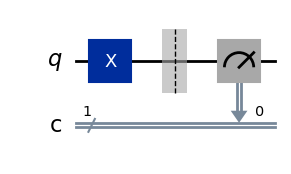

In [ ]:
display(message[0].draw(output='mpl'))

In [ ]:
print(bob_results)

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1]


Bob mantiene sus resultados en privado.

| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |                      |
|        message         |      message        |      message         |
|                        |                     |     bob_bases        |
|                        |                     |    bob_results       |

### 3.4 Paso 4:

Después de esto, Alicia revela (a través del canal de Eva) en qué base codificó cada qúbit:

| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |                      |
|        message         |      message        |      message         |
|                        |                     |     bob_bases        |
|                        |                     |    bob_results       |
|                        |    alice_bases      |    alice_bases       |

Y Bob revela en qué base midió cada qúbit:

| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |                      |
|        message         |      message        |      message         |
|                        |                     |     bob_bases        |
|                        |                     |    bob_results       |
|                        |    alice_bases      |    alice_bases       |
|      bob_bases         |     bob_bases       |        &nbsp;        |

Si Bob llegó a medir un qúbit en la misma base en la que Alicia lo preparó, entonces la entrada correspondiente en `bob_results` coincidirá con la de `alice_bits`, y pueden usar ese bit como parte de su clave. Si midieron en bases distintas, el resultado de Bob es aleatorio y ambos descartan ese bit. A continuación se muestra una función `remove_garbage` que se encarga de hacer esto por nosotros:


In [ ]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # Si ambos usaron la misma base, añadir
            # estos a la lista de bits buenos
            good_bits.append(int(bits[q]))
    return good_bits

Alicia y Bob descartan los bits inútiles y utilizan los bits restantes para formar sus claves secretas.


* Generación de la llave privada.

In [ ]:
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]


| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |                      |
|        message         |      message        |      message         |
|                        |                     |     bob_bases        |
|                        |                     |    bob_results       |
|                        |    alice_bases      |    alice_bases       |
|      bob_bases         |     bob_bases       |                      |
|      alice_key         |                     |        &nbsp;        |


In [ ]:
print(len(alice_key))

43


### 3.5 Paso 5:

Finalmente, Bob y Alicia comparan una selección aleatoria de bits de sus claves para asegurarse de que el protocolo ha funcionado correctamente:


In [ ]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # usar np.mod para asegurarnos de que
        # el bit muestreado esté
        # dentro del rango de la lista
        i = np.mod(i, len(bits))
        # pop(i) quita el elemento de la lista
        # en el índice 'i'
        sample.append(bits.pop(i))
    return sample

Alicia y Bob publican estos bits de forma pública y los eliminan de sus claves, ya que ya no son secretos:


In [ ]:
np.random.seed(seed=0)
n = 100

## paso 1
# Alice genera sus bitws
alice_bits = randint(2, size=n)

## paso 2
# crear el arreglo con las bases en
# las que los bits se codifican
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## paso 3
# decidir en que base medir
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## paso 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

## paso 5
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
alice_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |                      |
|        message         |      message        |      message         |
|                        |                     |     bob_bases        |
|                        |                     |    bob_results       |
|                        |    alice_bases      |    alice_bases       |
|      bob_bases         |     bob_bases       |                      |
|      alice_key         |                     |      bob_key         |
|      bob_sample        |     bob_sample      |     bob_sample       |
|     alice_sample       |    alice_sample     |    alice_sample      |


In [ ]:
bob_sample == alice_sample

True

Si sus muestras coinciden, significa que (con alta probabilidad) `alice_key == bob_key`. ¡Ahora comparten una clave secreta que pueden usar para cifrar sus mensajes!

| Conocimiento de Alicia | Por el canal de Eva | Conocimiento de Bob |
|:----------------------:|:-------------------:|:--------------------:|
|      alice_bits        |                     |                      |
|     alice_bases        |                     |                      |
|        message         |      message        |      message         |
|                        |                     |     bob_bases        |
|                        |                     |    bob_results       |
|                        |    alice_bases      |    alice_bases       |
|      bob_bases         |     bob_bases       |                      |
|      alice_key         |                     |      bob_key         |
|      bob_sample        |     bob_sample      |     bob_sample       |
|     alice_sample       |    alice_sample     |    alice_sample      |
|      shared_key        |                     |     shared_key       |


 # Ejemplo en Qiskit: con espionaje

Veamos ahora cómo pueden saber Alicia y Bob si Eva ha intentado espiar su mensaje cuántico. Repetimos los mismos pasos que en el caso sin interferencia, pero antes de que Bob reciba sus qubits, Eva intentará extraer algo de información de ellos. Vamos a establecer una semilla diferente para obtener un conjunto específico de resultados 'aleatorios' reproducibles:


In [ ]:
#np.random.seed(seed=3) # NO ES NECESARIA SI SE IMPLEMENTA ALEATORIEDAD REAL

### 4.1 Paso 1:

Alicia genera su conjunto de bits aleatorios:


In [ ]:
#np.random.seed(seed=3) # NO ES NECESARIA SI SE IMPLENMENTA ALEATORIEDAD REAL
## paso 1
#alice_bits = randint(2, size=n) # SE REEMPLAZA POR  LA FUNCION generate_bits_total(n)
alice_bits = generate_bits_total(n)
print(alice_bits)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]


### 4.2 Paso 2:

Alicia codifica estos bits en las bases $Z$ y $X$ de forma aleatoria, y los envía a Bob a través del canal cuántico de Eva:


In [ ]:
#np.random.seed(seed=3) # NO ES NECESARIA SI SE IMPLENMENTA ALEATORIEDAD REAL
## paso 1
#alice_bits = randint(2, size=n) # SE REEMPLAZA POR  LA FUNCION generate_bits_total(n)
alice_bits = generate_bits_total(n)
## paso 2
#alice_bases = randint(2, size=n) # SE REEMPLAZA POR  LA FUNCION generate_bits_total(n)
alice_bases = generate_bits_total(n)

message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0]


En este caso, el primer qubit en el mensaje de Alicia está en el estado $|+\rangle$:


bit = 0
basis = 1


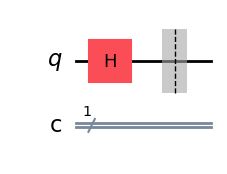

In [ ]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])
display(message[0].draw(output='mpl'))

### ¡Interceptación!

¡Oh no! Eva intercepta el mensaje mientras pasa por el canal. Intenta medir los qubits en una selección aleatoria de bases, de la misma forma en que lo hará Bob más adelante.


In [ ]:
#np.random.seed(seed=3) # NO ES NECESARIA SI SE IMPLENMENTA ALEATORIEDAD REAL
## paso 1
alice_bits = generate_bits_total(n)
## paso 2
alice_bases = generate_bits_total(n)

message = encode_message(alice_bits, alice_bases)
## Interceptación !!!
eve_bases = generate_bits_total(n)

intercepted_message = measure_message(message, eve_bases)
print(intercepted_message)

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]


Podemos ver el caso del qubit 0 a continuación; la elección aleatoria de base por parte de Eva no coincide con la de Alicia, y esto cambiará el estado del qubit de $|+\rangle$ a un estado aleatorio en la base $Z$, con una probabilidad del 50% de ser $|0\rangle$ o $|1\rangle$:


bit = 1
basis = 0


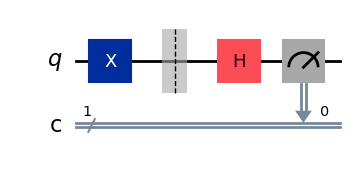

In [ ]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])
display(message[0].draw(output='mpl'))

### 4.3 Paso 3:

Eva luego le pasa los qubits a Bob, quien los mide aleatoriamente. En este caso, Bob eligió (por casualidad) medir en la misma base en la que Alicia preparó el qubit. Sin intercepción, Bob tendría garantizado medir `0`, pero como Eva intentó leer el mensaje, ahora tiene un 50% de probabilidad de medir `1` en su lugar.


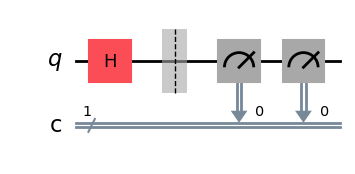

In [ ]:
#np.random.seed(seed=3)
## paso 1
alice_bits = generate_bits_total(n)
## paso 2
alice_bases = generate_bits_total(n)
message = encode_message(alice_bits, alice_bases)
## Interceptación !!!
eve_bases = generate_bits_total(n)
intercepted_message = measure_message(message, eve_bases)
## paso 3
bob_bases = generate_bits_total(n)
bob_results = measure_message(message, bob_bases)
display(message[0].draw(output='mpl'))

### 4.4 Paso 4:

Bob y Alicia revelan sus elecciones de bases y descartan los bits inútiles:


In [ ]:
#np.random.seed(seed=3)
## paso 1
alice_bits = generate_bits_total(n)
## paso 2
alice_bases = generate_bits_total(n)
message = encode_message(alice_bits, alice_bases)
## Interceptación!!
eve_bases = generate_bits_total(n)
intercepted_message = measure_message(message, eve_bases)
## paso 3
bob_bases = generate_bits_total(n)
bob_results = measure_message(message, bob_bases)
## paso 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

In [ ]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample

### 4.5 Paso 5:

Bob y Alicia comparan la misma selección aleatoria de sus claves para ver si los qubits fueron interceptados:


In [ ]:
np.random.seed(seed=3)
## paso 1
alice_bits = generate_bits_total(n)
## paso 2
alice_bases = generate_bits_total(n)
message = encode_message(alice_bits, alice_bases)
## Interceptaciion!!
eve_bases = generate_bits_total(n)
intercepted_message = measure_message(message, eve_bases)
## paso 3
bob_bases = generate_bits_total(n)
bob_results = measure_message(message, bob_bases)
## paso 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
## paso 5
sample_size = 15
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
alice_sample = [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]


In [ ]:
bob_sample == alice_sample

False

In [ ]:
n = 100
# paso 1
alice_bits = generate_bits_total(n)
alice_bases = generate_bits_total(n)
# paso 2
message = encode_message(alice_bits, alice_bases)
# Interceptacion!
eve_bases = generate_bits_total(n)
intercepted_message = measure_message(message, eve_bases)
# paso 3
bob_bases = generate_bits_total(n)
bob_results = measure_message(message, bob_bases)
# paso 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
# paso 5
sample_size = 15 # Reducir este valor para observar si
                 # Eva puede interceptar el mensaje
                 # sin que Alice y Bob se enteren
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

if bob_sample != alice_sample:
    print("Espionaje de Eva fue detectado.")
else:
    print("Espionaje NO DETECTADO!")

Espionaje de Eva fue detectado.


# Análisis de riesgos - Probabilidad de espionaje no detectado

Con base en la teoría de la probabilidad, se realiza un análisis sobre cuán probable es que un espía logre su cometido sin ser detectado por Alice y Bob. Tambien se demuestra por qué esta probabilidad se vuelve despreciable ante una alta cantidad de qubits involucrada.

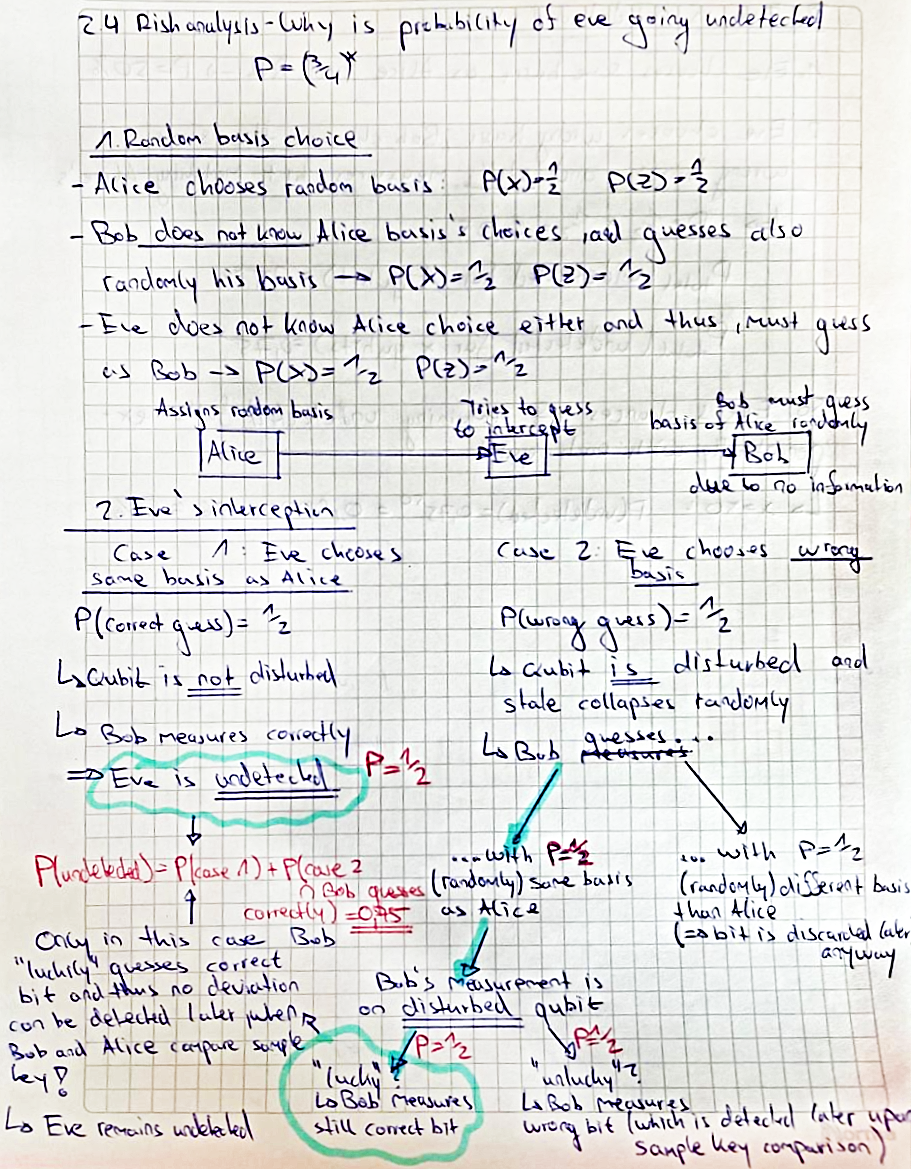

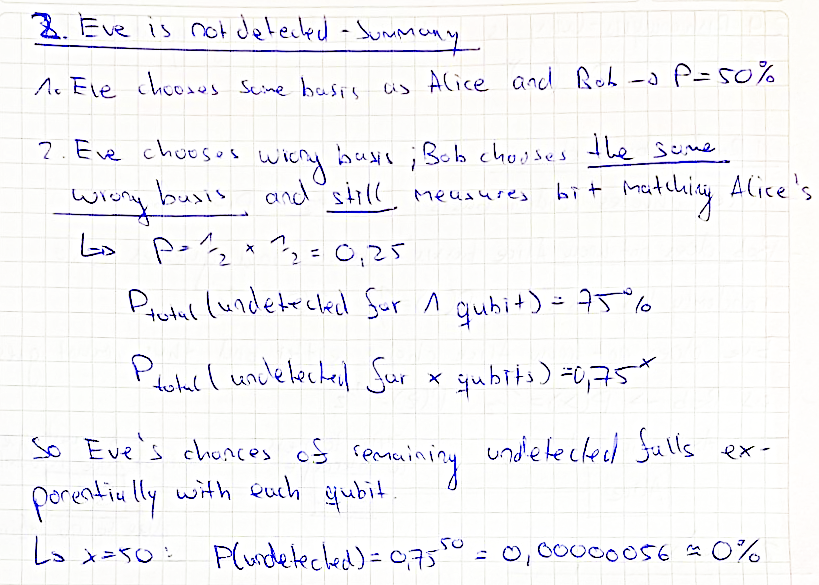

### Sintetizando lo anterior...

## Caso 1: Eva escoge la **base correcta**

Con probabilidad $1/2$, Eva elige **la misma base que usó Alice**.

- En este caso, su medición **no altera el estado** del qúbit.
- Luego, reenvía el estado tal cual a Bob.
- Cuando Bob mida (sea en la base correcta o no), **el valor estará intacto** si él usa la misma base que Alice.

 **Eva no es detectada**.

Entonces:

$$
P(\text{no detectada} \mid \text{Eva acierta base}) = 1
$$

---

## Caso 2: Eva escoge la **base incorrecta**

Con probabilidad $1/2$, Eva **se equivoca de base**.

- Al medir en la base equivocada, el qúbit **colapsa a un estado diferente** del original.
- Luego Eva reenvía ese nuevo estado a Bob.
- Si **Bob usa la misma base que Alice**, el qúbit **ya no estará en el estado correcto**.
- Bob medirá el bit correcto con probabilidad $1/2$ y el incorrecto con probabilidad $1/2$.

Entonces, **incluso si las bases de Alice y Bob coinciden**, **Eva no siempre será detectada**.

Eva **no es detectada** en este caso si:
1. Se equivoca de base (probabilidad $1/2$)
2. Pero Bob mide el bit correcto de todos modos (probabilidad $1/2$)

Luego:

$$
P(\text{no detectada} \mid \text{Eva falla base}) = \frac{1}{2}
$$

---

## Probabilidad total de no ser detectada en un qúbit

Combinamos ambos escenarios:

- Con 50% de probabilidad, Eva acierta la base y no es detectada.
- Con 50% de probabilidad, Eva falla la base, y tiene 50% de no ser detectada.

Desde el punto de vista de teoría de conjuntos, la probabilidad total de que Eva no sea detectada se puede escribir como la **unión de dos eventos mutuamente excluyentes**:

$$
P(\text{no detectada}) = P(\text{acierta base}) \cup P(\text{falla base y no es detectada})
$$

Entonces los eeventos que son disjuntos, se suman:

$$
P(\text{Eva no detectada en 1 qúbit}) =
\frac{1}{2} \cdot 1 + \frac{1}{2} \cdot \frac{1}{2} = \frac{3}{4} = 0.75
$$

---

## Probabilidad de no ser detectada en múltiples qúbits

Si Eva intercepta $x$ qúbits, y **cada uno tiene probabilidad $0.75$ de no delatarla**, la probabilidad de que **logre espiar los $x$ qúbits sin ser detectada en ninguno** es:

$$
P(\text{no detectada en } x \text{ qúbits}) = 0.75^x
$$

Esto se debe a que los eventos son **independientes** (cada qúbit se mide por separado y Eva repite su táctica cada vez).

---

## Ejemplo numérico

- Si Eva intercepta 5 qúbits:
  $$
  P = 0.75^5 \approx 0.237
  $$

- Si intercepta 10 qúbits:
  $$
  P = 0.75^{10} \approx 0.056
  $$

- Si intercepta 20 qúbits:
  $$
  P = 0.75^{20} \approx 0.00317
  $$

- Si intercepta 50 qúbits:
  $$
  P = 0.75^{50} \approx 0.00000566
  $$
---

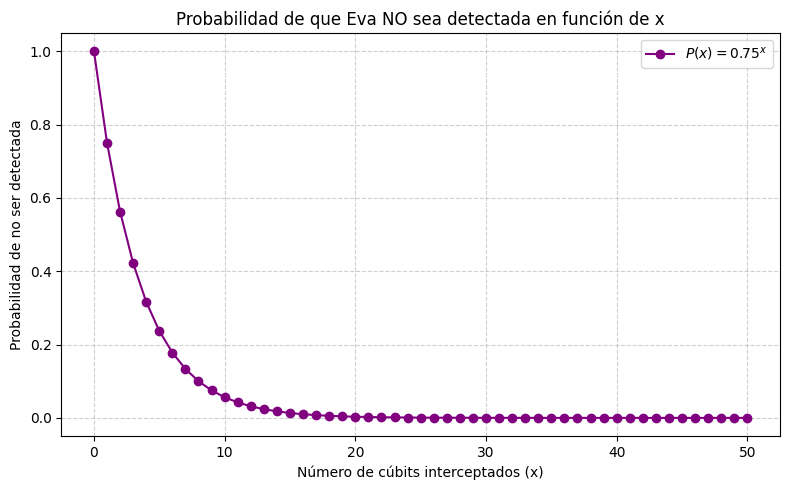

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Rango de qúbits interceptados (x)
x = np.arange(0, 51, 1)

# Probabilidad de no ser detectada
P = 0.75 ** x

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(x, P, marker='o', color='purple', label=r'$P(x) = 0.75^x$')
plt.title('Probabilidad de que Eva NO sea detectada en función de x')
plt.xlabel('Número de qúbits interceptados (x)')
plt.ylabel('Probabilidad de no ser detectada')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Encriptado de un mensaje secreto


In [ ]:
#Mensaje a codificar.
message_to_send= "vamos a ganar cuantica :)"

* Función para encriptar mensaje

In [ ]:
def encode_message_jose(message_binary,private_key):
  counter=0
  counter_key=0
  encode_message_to_send=[]
  while counter!=len(message_binary):
    message_binary[counter]^=private_key[counter_key]
    encode_message_to_send.append(message_binary[counter])
    counter+=1
    if(counter_key<len(private_key)-1):
      counter_key+=1
    else:
      counter_key=0
  return encode_message_to_send

* Función para pasar cada caracter a su equivalente ascii de 8 bits

In [ ]:
def string_a_bits(cadena):
    bits = []
    for c in cadena:
        binario = format(ord(c), '08b')
        bits.extend([int(b) for b in binario])
    return bits


In [ ]:
binary_message_to_send= string_a_bits(message_to_send)
encode_binary= encode_message_jose(binary_message_to_send,alice_key)

In [ ]:
print(encode_binary)

[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]


* Función para desencriptar mensaje (mismo proceso XOR)

In [ ]:
def decode_message_jose(encoded_binary, private_key):
    counter = 0
    counter_key = 0
    decoded_bits = []
    while counter != len(encoded_binary):
        bit = encoded_binary[counter] ^ private_key[counter_key]
        decoded_bits.append(bit)
        counter += 1
        if counter_key < len(private_key) - 1:
            counter_key += 1
        else:
            counter_key = 0
    return decoded_bits

* Función para convertir bytes a caracteres ASCII

In [ ]:
def bits_a_string(bits):
    chars = []
    for i in range(0, len(bits), 8):
        byte = bits[i:i+8]
        byte_str = ''.join(str(b) for b in byte)
        char = chr(int(byte_str, 2))
        chars.append(char)
    return ''.join(chars)

* Desencriptar mensaje

In [ ]:
decoded_binary = decode_message_jose(encode_binary, alice_key)
decoded_message = bits_a_string(decoded_binary)

In [ ]:
print(decoded_message)

vamos a ganar cuantica :)


In [ ]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 2.0.3
IBM RunTime Version: 0.40.1
Qiskit_Aer Version: 0.17.1
Python Version: 3.11.13
2025 ©


# Análisis de resultados
* La computación cuántica está revolucionando la seguridad de la información. Gracias a las propiedades cuánticas de partículas como los fotones, se puede generar verdadera aleatoriedad, lo que hace que los sistemas sean más seguros y difíciles de predecir. Uno de los protocolos más conocidos que aprovecha estas características es el BB84. Este permite que dos personas, comúnmente llamadas Alice y Bob, compartan una clave secreta sin necesidad de un canal físico el cual puede llegar a ser bastante inseguro. Al aplicar este protocolo, logramos codificar y decodificar el mensaje "vamos a ganar cuántica :)" con éxito. A pesar de que la clave utilizada fue completamente aleatoria, el mensaje se transmitió con alta seguridad y fue correctamente interpretado al final.




#Conclusiones

* En conclusión, la computación cuántica, a través del protocolo BB84, demuestra ser una herramienta poderosa para fortalecer la seguridad de la información, al permitir el intercambio de claves secretas con alta aleatoriedad y eficacia, garantizando así comunicaciones seguras incluso sin un canal físico confiable.

* El tutorial de Qiskit sobre Distribución Cuántica de Claves (QKD) demuestra de manera efectiva cómo Alice y Bob pueden generar una clave secreta compartida utilizando el protocolo BB84. El proceso simula la preparación, transmisión y medición de qubits a través de un canal cuántico, usando cadenas aleatorias de bits y bases (Z y X) aleatorias. La idea clave es que solo se conservan aquellos bits en los que Alice y Bob utilizaron la misma base para formar la clave secreta.

* Desde la perspectiva de la computación cuántica, la implementación solo requiere un registro cuántico de un qubit por bit y arreglos clásicos para almacenar los bitstrings y bases. Funciones como encode_message, measure_message y remove_garbage permiten simular todo el ciclo de comunicación, incluyendo la detección de posibles escuchas.

* Limitación de Eve:
La tabla (Tabla 1) muestra un punto clave: Eve no tiene acceso completo a toda la información intercambiada. Solo puede interceptar lo que se envía por el canal cuántico y la comunicación clásica pública (como la comparación de bases). Sin embargo, los bits reales de la clave (el bitstring de Alice y el subconjunto que coincide) nunca se revelan públicamente. Dado que Eve no conoce las bases de preparación ni los resultados de medición, incluso si intercepta los qubits, no tiene forma de saber si sus mediciones coinciden con las de Alice y Bob.

  Esto demuestra la seguridad del protocolo: sin conocer la base correcta, cualquier intento de espionaje por parte de Eve perturbará los estados cuánticos e introducirá errores detectables estadísticamente al comparar muestras de la clave compartida.

* Protocolo BB84:
El protocolo BB84 es un pilar fundamental de la criptografía cuántica y ofrece un método teóricamente inquebrantable para la distribución de claves. Su seguridad se basa en principios cuánticos fundamentales:

 - El principio de incertidumbre de Heisenberg: Medir un estado cuántico sin la base correcta lo perturba.

  - El teorema de no clonación: No se pueden copiar estados cuánticos, por lo tanto, Eve no puede duplicar los qubits.

  - Comparación aleatoria de bases: Solo se usan los bits con bases coincidentes para la clave final.

* La simulación en Qiskit muestra cómo se pueden modelar estos principios utilizando herramientas prácticas para generar una clave compartida incluso en presencia de un espía. Además, la simulación usando np.random.seed() puede extenderse para usar aleatoriedad cuántica real (por ejemplo, utilizando compuertas Hadamard y mediciones) para una implementación aún más realista.

* Avances en criptografíá propuestos desde la cuántica ofrecen una ventaja interesante frente a los paradigmas clásicos. Como muestra de ello, tenemos que la complejidad ya no depende de las dificultades asociadas a la complejidad computacional que suponen, por ejemplo, métodos como la factorización de números primos muy grandes. Sino que la complejidad recae sobre la imposibilidad de clonar información y la naturaleza cuántica asociada a su indeterminación. Esto es importante ya que ofrece un sistema de seguridad muchisimo más escalable. Esto es, que mientras se disponga de una cantidad de qubits aceptable (dependerá de diversos criterios), la seguridad de protocolos como BB84 es extremadamente alta, ya que no se puede romper simplemente agregando más capacidad de cómputo bruto, sino que implica sortear una barrera interpuesta por la mecánica cuántica (o violar principios físicos, lo cuál no es muy realista).

* En consonancia con lo anterior, se muestra que el la computación cuántica no solo ofrece una capacidad (por paralelismo cuántico) para romper protocolos de seguridad clásicos donde la barrera a sortear es la cantidad de cálculos a realizar. Sino que también ofrece una nueva filosofía de criptografía que ni la misma computación cuántica puede romper (nuevamente, esto implicaría violar ciertos principios físicos).

* No obstante, debe tenerse muy en cuenta que el mecanismo de seguridad propuesto en BB84 recae más en un auto-sabotaje por parte Eve. Con lo que el mecanismo recae, irónicamente, en la participación de un espía, para entrar en funcionamiento. También hay que tener en cuenta que el sistema de seguridad se basa en advertir a los interlocutores, sobre la presencia de un espía, con lo que estos tendrán la responsabilidad de cortar la comunicación (incluso si la intromisión de Eve puede introducir errores en el mensaje al desconocer la base en la que se codifica cada qubit). De esto se infiere que si bien el sistema puede hasta cierto punto garantizar que la información no sea obtenida por Eve, esta última podría tener como objetivo secundario sabotear la comunicación entre Alice y Bob, entorpeciéndola y obligando a ambos a reiniciar el proceso.

* De lo anterior, se sugiere entonces explorar nuevas alternativas en cuanto a criptografía cuántica que contemplen mecanismos para garantizar que la línea de comunicación no solo no se vea "chuzada", sino también que no se vea cortada o saboteada.

#Bibliografía

[1]. Charles H. Bennett, Gilles Brassard,
Quantum cryptography: Public key distribution and coin tossing,
Theoretical Computer Science,
Volume 560, Part 1,
2014,
Pages 7-11,
ISSN 0304-3975,
https://doi.org/10.1016/j.tcs.2014.05.025.
(https://www.sciencedirect.com/science/article/pii/S0304397514004241)

[2] “Quantum Key Distribution and BB84 Protocol,” Medium, Jun. 21, 2020. [Online]. Available: https://medium.com/quantum-untangled/quantum-key-distribution-and-bb84-protocol-6f03cc6263c5
(Accedido: 20-jun-2025).

[3] S. R. M. Sujaykumar and B. Chandra Mohan, “Comprehensive Analysis of BB84, A Quantum Key Distribution Protocol,” arXiv preprint arXiv:2312.05609v1, Dec. 9, 2023. [Online]. Available: https://arxiv.org/html/2312.05609v1
(Accedido: 20-jun-2025).
